# DNN

In [72]:
from collections import Counter

import numpy as np
import pandas as pd

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

import matplotlib.pyplot as plt

## 데이터 가져오기

In [87]:
train_set = pd.read_csv('train_set.csv')
train_set = train_set[train_set['ECLO'] <= 20]
test_set = pd.read_csv('test_set.csv')

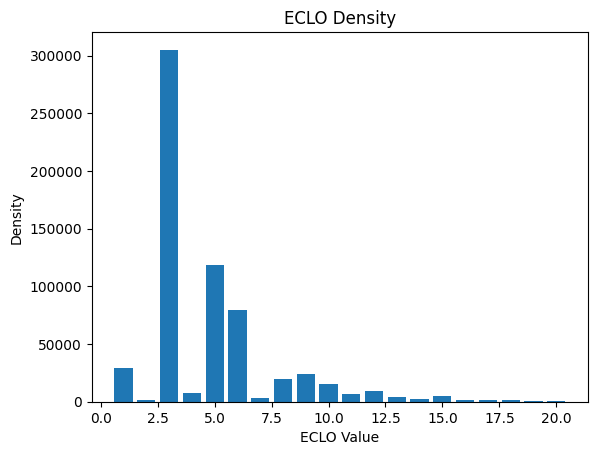

In [88]:
density = Counter(train_set['ECLO'])
plt.bar(sorted(list(density.keys())), [density[i] for i in sorted(density.keys())])
plt.xlabel('ECLO Value')
plt.ylabel('Density')
plt.title('ECLO Density')
plt.show()

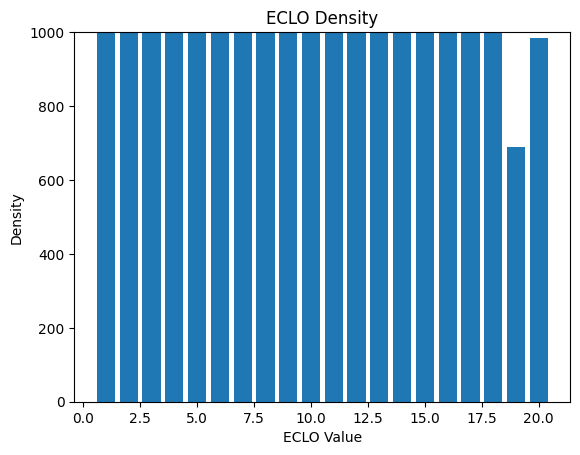

In [94]:
density = Counter(train_set['ECLO'])
plt.bar(sorted(list(density.keys())), [density[i] for i in sorted(density.keys())])
plt.xlabel('ECLO Value')
plt.ylabel('Density')
plt.ylim((0, 1000))
plt.title('ECLO Density')
plt.show()

In [95]:
train_set = pd.concat([train_set[train_set['ECLO']==i][:1000] for i in range(1, 21)])

In [96]:
len(train_set)

19672

## train test valid 분리

In [104]:
train_x, test_x, train_y, test_y = train_test_split(train_set[['요일', '기상상태', '도로형태', '노면상태', '사고유형']], train_set['ECLO'], test_size=0.2)

In [98]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2)

## tensorflow model 정의

In [99]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(5)),
    tf.keras.layers.Dense(5, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(1)]
)

In [100]:
checkpoint_filepath = "logs/DNN/"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
)

In [101]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=['mae'])
model.fit(train_x, train_y, epochs=100, validation_data=(valid_x, valid_y),
          callbacks=[
                        checkpoint_callback,
                        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3),
                    ])

Epoch 1/100
394/394 [==============================] - 6s 10ms/step - loss: 1.1549 - mae: 7.0628 - val_loss: 0.7266 - val_mae: 6.6731
Epoch 2/100
394/394 [==============================] - 4s 10ms/step - loss: 0.5934 - mae: 5.7699 - val_loss: 0.6793 - val_mae: 6.5839
Epoch 3/100
394/394 [==============================] - 4s 11ms/step - loss: 0.5363 - mae: 5.5172 - val_loss: 0.7265 - val_mae: 6.7156
Epoch 4/100
394/394 [==============================] - 4s 11ms/step - loss: 0.5049 - mae: 5.3856 - val_loss: 0.6739 - val_mae: 6.5603
Epoch 5/100
394/394 [==============================] - 4s 11ms/step - loss: 0.4934 - mae: 5.3484 - val_loss: 0.6354 - val_mae: 6.4344
Epoch 6/100
394/394 [==============================] - 4s 11ms/step - loss: 0.4735 - mae: 5.2750 - val_loss: 0.6403 - val_mae: 6.4544
Epoch 7/100
394/394 [==============================] - 4s 11ms/step - loss: 0.4632 - mae: 5.2424 - val_loss: 0.5905 - val_mae: 6.2756
Epoch 8/100
394/394 [==============================] - 4s 11ms

In [102]:
tmp = model.predict(test_x).reshape(-1)
print(f'minimum : {min(tmp)}, maximun : {max(tmp)}')

123/123 [==============================] - 0s 3ms/step
minimum : 6.419898986816406, maximun : 6.959800720214844


In [106]:
tmp = pd.read_csv('train_set.csv')
tmp = tmp[tmp['ECLO'] <= 20]
np.sqrt(mean_squared_log_error(tmp['ECLO'], model.predict(tmp[['요일', '기상상태', '도로형태', '노면상태', '사고유형']])))

19950/19950 [==============================] - 54s 3ms/step


0.5790210410571732

## 결과 저장

In [107]:
ECLOs = model.predict(test_set[['요일', '기상상태', '도로형태', '노면상태', '사고유형']])
ans = pd.read_csv('open/sample_submission.csv')
ans['ECLO'] = ECLOs
ans.to_csv('ans_dnn.csv', index=False)

343/343 [==============================] - 1s 3ms/step
